In [1]:
import pandas as pd
import numpy as np
from os import listdir
import matplotlib.pylab as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import backend as K
from keras.preprocessing import image
from keras.layers import Dense, Dropout, Activation 
from keras.utils.np_utils import to_categorical
from keras.layers import Flatten,Conv2D, MaxPooling2D,AveragePooling2D
from keras.optimizers import SGD
import matplotlib.image as mpimg
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
y = pd.read_csv('question_1_dataset\Train.csv')    # reading the csv file
y.head()   

,name,category
0,1.png,9
1,2.png,3
2,3.png,9
3,4.png,8
4,5.png,13


In [3]:
y['category'].unique()

array([ 9,  3,  8, 13,  7,  2, 16,  6,  1, 14, 15, 12, 10, 11,  5,  4],
      dtype=int64)

In [4]:
path_train =r'question_1_dataset\train\train' #path of folder of train images    
path_test =r'question_1_dataset\test\test' #path of folder to test images    

In [5]:
print('Total training images:', len(os.listdir(path_train)))  
print('Total test images:', len(os.listdir(path_test)))   

Total training images: 4465
Total test images: 1914


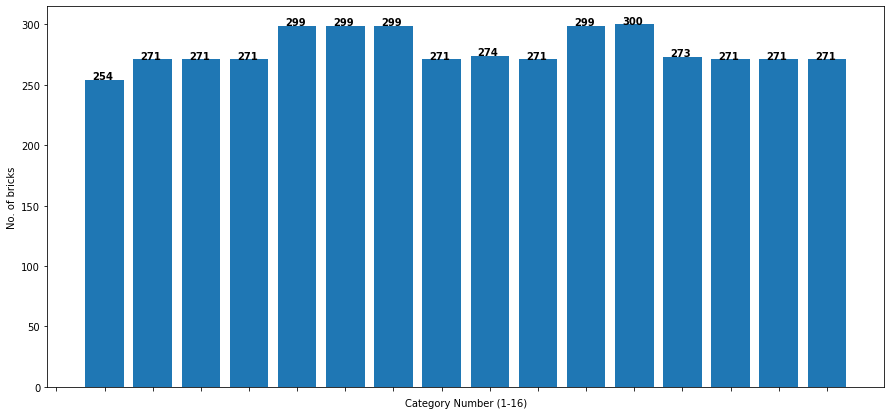

In [6]:
x= pd.Series(range(1,17))
z =y['category'].value_counts().sort_index()
plt.subplots(figsize=(15,7))
plt.bar(x, height=z)
xlocs, xlabs=plt.xticks()
xlocs=[i+1 for i in range(0,17)]
xlocs=[i/1 for i in range(0,17)]
plt.xlabel('Category Number (1-16)')
plt.ylabel('No. of bricks')
plt.xticks(xlocs, xlabs)
for i,v in enumerate(z):
    plt.text(xlocs[i]+0.75, v+0.5, str(v),fontweight='bold' )
plt.show()

In [7]:
img_width = 200
img_height = 200

X = []

for i in tqdm(range(y.shape[0])): 
    path = path_train + '\\' + os.path.join(y['name'][i])
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X.append(img)

X = np.array(X)

100%|██████████████████████████████████████████████████████████████████████████████| 4465/4465 [01:50<00:00, 40.32it/s]


In [8]:
X.shape

(4465, 200, 200, 3)

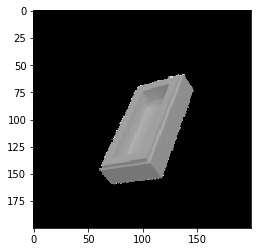

In [9]:
plt.imshow(X[0])

In [10]:
for i in range(len(y['category'])):
    y['category'][i]=y['category'][i]-1
 

C:\Users\win10\Anaconda3\envs\gpuenv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
y.head()

,name,category
0,1.png,8
1,2.png,2
2,3.png,8
3,4.png,7
4,5.png,12


In [12]:
del y['name']

In [13]:
y = np.asarray(y)
print(X.shape, y.shape)

(4465, 200, 200, 3) (4465, 1)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.25)

In [15]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 16)
y_test = to_categorical(y_test, num_classes = 16)

In [16]:
y_train.shape

(3348, 16)

In [17]:
X_train[0].shape

(200, 200, 3)

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=sgd,metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 64)      18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 98, 98, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 98, 98, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 614656)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               78676096  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [20]:
model.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
3348/3348 [==============================] - 598s 179ms/step - loss: 1.8888 - accuracy: 0.3584
Epoch 2/10
3348/3348 [==============================] - 542s 162ms/step - loss: 1.3354 - accuracy: 0.5108
Epoch 3/10
3348/3348 [==============================] - 538s 161ms/step - loss: 1.2146 - accuracy: 0.5448
Epoch 4/10
3348/3348 [==============================] - 538s 161ms/step - loss: 1.0805 - accuracy: 0.5983
Epoch 5/10
3348/3348 [==============================] - 542s 162ms/step - loss: 0.9896 - accuracy: 0.6323
Epoch 6/10
3348/3348 [==============================] - 542s 162ms/step - loss: 0.8447 - accuracy: 0.6679
Epoch 7/10
3348/3348 [==============================] - 540s 161ms/step - loss: 0.7670 - accuracy: 0.6986
Epoch 8/10
3348/3348 [==============================] - 566s 169ms/step - loss: 0.6793 - accuracy: 0.7279
Epoch 9/10
3348/3348 [==============================] - 798s 238ms/step - loss: 0.5850 - accuracy: 0.76379:41 - loss: 0
Epoch 10/10
3348/3348 [=========

In [42]:
y_pred = model.predict(X_test, batch_size=32)

In [43]:
y_pred = np.argmax(y_pred, axis=1)

In [44]:
y_pred

array([ 4, 13, 12, ...,  3,  3,  1], dtype=int64)

In [50]:
y_test= np.argmax(y_test, axis=1)

In [51]:
y_test

array([ 4, 13, 12, ...,  7,  3,  1], dtype=int64)

In [52]:
print("Accuracy = ", accuracy_score(y_test, y_pred)*100)
print("F1 = ", f1_score(y_test, y_pred,average='weighted')*100)

Accuracy =  83.70635631154879
F1 =  83.53886837644156


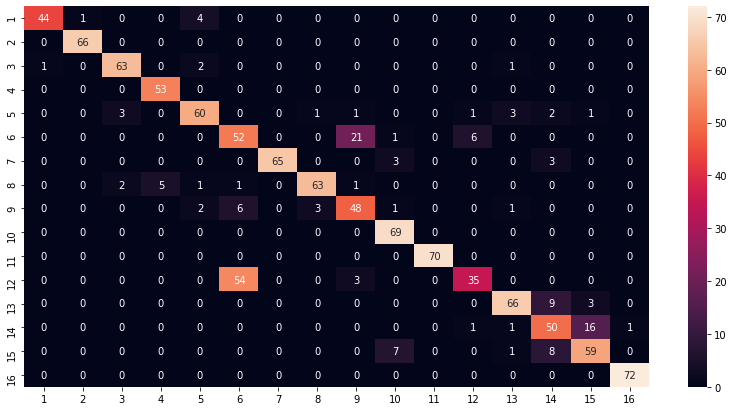

In [53]:
cm = confusion_matrix(y_test, y_pred)
df_matrix = pd.DataFrame(cm, range(1,17), range(1,17))
plt.figure(figsize=(14,7))
sns.heatmap(df_matrix, annot = True)

In [54]:
y_counts = pd.DataFrame({"y_test": y_test, "y_pred": y_pred})
y_counts.head()

,y_test,y_pred
0,4,4
1,13,13
2,12,12
3,5,5
4,7,7


In [55]:
y_test_counts =pd.DataFrame(y_counts['y_test'].value_counts())
y_test_counts = y_test_counts.sort_index()
y_test_counts

,y_test
0,49
1,66
2,67
3,53
4,72
5,80
6,71
7,73
8,61
9,69


In [56]:
y_pred_counts =pd.DataFrame(y_counts['y_pred'].value_counts())
y_pred_counts = y_pred_counts.sort_index()
y_pred_counts

,y_pred
0,45
1,67
2,68
3,58
4,69
5,113
6,65
7,67
8,74
9,81


<BarContainer object of 16 artists>

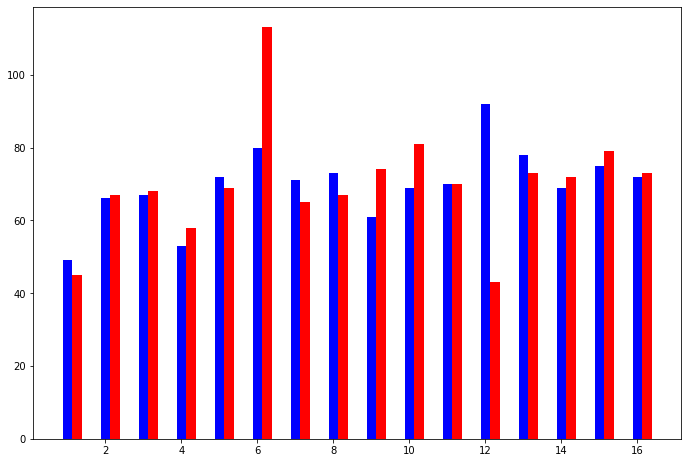

In [70]:
B=np.arange(1,17)
fig=plt.figure()
ax=fig.add_axes([0,0,1.5,1.5])
ax.bar(B+0.00, y_test_counts['y_test'],color='b',width=0.25)
ax.bar(B+0.25, y_pred_counts['y_pred'],color='r',width=0.25)


In [32]:
X_final = []
X_name = []
for i in tqdm(range(4466,6380)):
    path = str(i) + '.png'
    X_name.append(path)
    path = path_test + '\\' + path
    img = image.load_img(path, target_size=(img_width, img_height, 3))
    img = image.img_to_array(img)
    img = img/255.0
    X_final.append(img)

X_final = np.array(X_final)

100%|██████████████████████████████████████████████████████████████████████████████| 1914/1914 [01:02<00:00, 30.69it/s]


In [58]:
X_final.shape

(1914, 200, 200, 3)

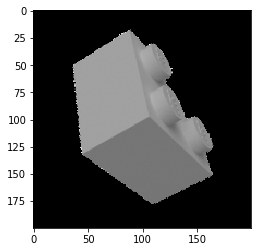

In [59]:
plt.imshow(X_final[0])

In [60]:
X_final= np.asarray(X_final)

In [61]:
test_pred = model.predict(X_final,batch_size=32)

In [62]:
test_pred[785]

array([1.2414759e-21, 1.0817096e-17, 2.2904675e-18, 1.1144146e-22,
       1.1680739e-12, 1.1382652e-13, 7.4906103e-07, 2.4730039e-21,
       1.0986907e-15, 1.9020117e-13, 8.3150579e-22, 1.2379183e-08,
       5.9723962e-12, 2.7525025e-13, 1.7343808e-08, 9.9999917e-01],
      dtype=float32)

In [63]:
test_pred = np.argmax(test_pred, axis=1)
for i in range(len(test_pred)):
    test_pred[i] += 1

In [64]:
test_pred[785]

16

In [65]:
df = pd.DataFrame({"name": X_name, "category": test_pred})

In [66]:
df.to_csv('predictions.csv', index=False)

In [67]:
df.head()

,name,category
0,4466.png,1
1,4467.png,6
2,4468.png,16
3,4469.png,12
4,4470.png,12


In [68]:
counts =pd.DataFrame(df['category'].value_counts())
counts = counts.sort_index()
counts

,category
1,105
2,137
3,132
4,134
5,106
6,138
7,107
8,129
9,132
10,159


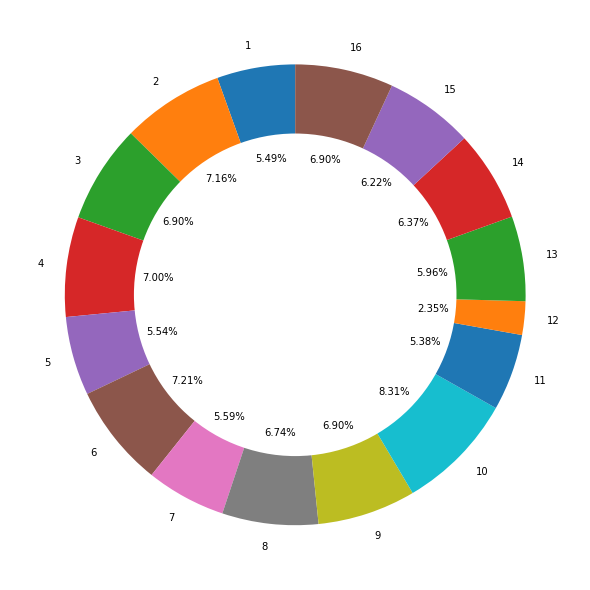

In [69]:
fig = plt.figure()
ax =fig.add_axes([0,0,2,2])
label = range(1,17)
s = counts['category']
ax.pie(s,labels=label,autopct='%1.2f%%', startangle=90)

centre_circle= plt.Circle((0,0),0.70,fc='white')
fig =plt.gcf()
fig.gca().add_artist(centre_circle)

ax.axis =('equal')
plt.show()